# Ejercicios de Grafo

In [233]:
import json as js
import networkx as nx
import matplotlib
import sys
import nbconvert
%matplotlib inline


In [225]:
class mi_grafo:
    listaAdj={}
    num_vertices=0
    visitados={}
    def __init__(self):
        self.num_vertices=0
        self.listaAdj={}
        self.num_vertices=0
    def __str__(self):
        return(js.dumps(self.listaAdj))
    def __insertedge(self,v1,v2):
        if v1 not in self.listaAdj.keys():
            self.listaAdj[v1]=[]
        self.listaAdj[v1]+=[(v2,0)]
    def listaSinPesos(self):
        listaAdj2={}
        for v in self.listaAdj.keys():
            listaAdj2[v]=[nodo for nodo,peso in self.listaAdj[v]]
        return listaAdj2
    def insertEdge(self,v1,v2):
        self.__insertedge(v1,v2)
        self.__insertedge(v2,v1)
    def insertEdge_con_peso(self,v1,v2,peso):
        if v1 not in self.listaAdj.keys():
            self.listaAdj[v1]=[(v2,peso)]
            self.num_vertices+=1
        else:
            self.listaAdj[v1]+=[(v2,peso)]
        if v2 not in self.listaAdj.keys():
            self.listaAdj[v2]=[]
            self.num_vertices+=1
    def __visitaDFS(self,llave,reco):
        self.visitados[llave]=True
        reco.append(llave)
        for vecino,peso in self.listaAdj[llave]:
            if not self.visitados[vecino]:
                self.__visitaDFS(vecino,reco)
        
    def visitaDFS(self):
        recorrido=[]
        for llave in self.listaAdj.keys():
            self.visitados[llave]=False
        for llave in self.listaAdj.keys():
            if not self.visitados[llave]:
                self.__visitaDFS(llave,recorrido)
        return(recorrido)
    
    def Prim(self,s):
        llave={}
        Pi={}
        for v in self.listaAdj.keys():
            llave[v]=sys.maxsize
            Pi[v]=None
        llave[s]=0
        Q=sorted(llave,key=lambda x: llave[x])
        while len(Q) > 0:
            v=Q[0]
            for u in self.listaAdj[v]:
                if u[0]  in Q and u[1] < llave[u[0]]:
                    llave[u[0]]=u[1]
                    Pi[u[0]]=v
            del llave[v]
            Q=sorted(llave,key=lambda x: llave[x])
        return Pi
    def __HamPath(self,llave,reco):
        self.visitados[llave]=True
        reco.append(llave)
        if len(reco)==len(self.listaAdj.keys()):
            return True
        done=False
        for vecino,peso in self.listaAdj[llave]:
            if not self.visitados[vecino]:
                done=self.__HamPath(vecino,reco)
            if done:
                break
        
        if not done:
            self.visitados[llave]=False
            reco.pop()
        return done
    
    def HamPath(self):
        recorrido=[]
        done=False
        for llave in self.listaAdj.keys():
            self.visitados[llave]=False
        for llave in self.listaAdj.keys():
            if not self.visitados[llave]:
                done=self.__HamPath(llave,recorrido)
            if done:
                break
        if not done:
            return("no hay camino")
        return(recorrido)
    
    ##graph diameter. shortest longest path
    def shortest_path(self,v1,v2):
        if v1==v2:
            return (0)
        for v in self.listaAdj.keys():
            self.visitados[v]=False
        Q=[(v1,0)] # Including the level with each vertex
        self.visitados[v1]=True
        termine=False
        while len(Q)>0 and not termine:
            v,level=Q.pop(0)
            if v==v2:
                termine=True
            else:
                for vecino,peso in self.listaAdj[v]:
                    if not self.visitados[vecino]:
                        Q.append((vecino,level+1))
                        self.visitados[vecino]=True
        if termine:
            return (level)
        return(-1)
    
    ##graph diameter. losngest shortest path
    def diameter(self):
        diametro=0
        for v1 in self.listaAdj.keys():
            for v2 in self.listaAdj.keys():
                if v1!=v2:
                    length=self.shortest_path(v1,v2)
                    if length==-1:
                        raise ValueError('Grafo inconexo')
                    if diametro< length:
                        diametro=length
        return diametro
        
            
        
            
            
                    
                    
                
        
            
        

In [226]:
g=mi_grafo()

In [227]:
#Si tiene
g.insertEdge('a','b')
g.insertEdge('a','h')
g.insertEdge('b','c')
g.insertEdge('h','i')
g.insertEdge('h','g')
g.insertEdge('i','c')
g.insertEdge('i','g')

g.insertEdge('c','d')
g.insertEdge('g','f')
g.insertEdge('c','f')
g.insertEdge('d','e')
g.insertEdge('d','f')
g.insertEdge('e','f')

In [228]:
G=nx.from_dict_of_lists(g.listaSinPesos())

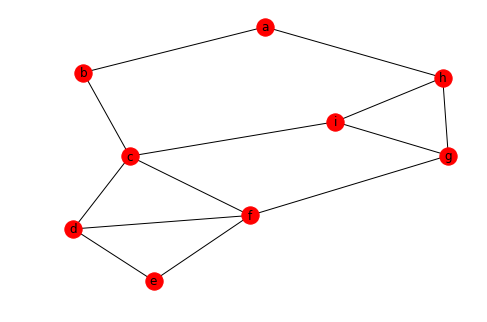

In [229]:
nx.draw(G,with_labels=True)

In [230]:
g.HamPath()

['a', 'b', 'c', 'i', 'h', 'g', 'f', 'd', 'e']

In [231]:
g.shortest_path('a','e')

4

In [232]:
g.diameter()

4

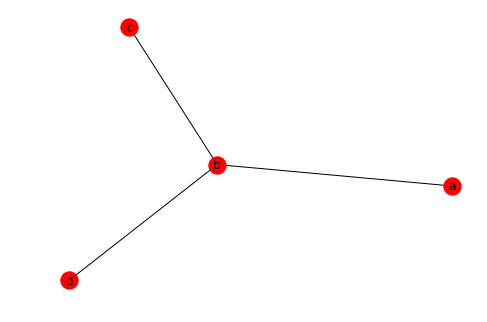

In [137]:
###No tiene
f=mi_grafo()
f.insertEdge('a','b')
f.insertEdge('b','c')
f.insertEdge('b','d')
F=nx.from_dict_of_lists(f.listaSinPesos())
nx.draw(F,with_labels=True)

In [138]:
f.HamPath()

'no hay camino'

In [139]:
g=mi_grafo()

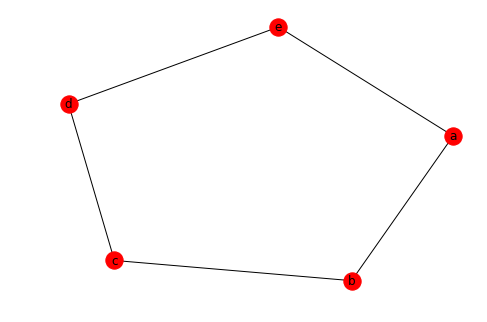

In [144]:
g.insertEdge_con_peso('a','b',1)
g.insertEdge_con_peso('b','c',1)
g.insertEdge_con_peso('c','d',1)
g.insertEdge_con_peso('d','e',1)
g.insertEdge_con_peso('a','e',3)
F=nx.from_dict_of_lists(g.listaSinPesos())
nx.draw(F,with_labels=True)

In [141]:
g.Prim('a')

{'a': None, 'b': 'a', 'c': 'b', 'd': 'c', 'e': 'd'}

In [142]:
g.HamPath()

['a', 'b', 'c', 'd', 'e']

In [143]:
g.listaAdj

{'a': [('b', 1), ('e', 3)],
 'b': [('c', 1)],
 'c': [('d', 1)],
 'd': [('e', 1)],
 'e': []}